<a href="https://colab.research.google.com/github/aaryamanz/Investment-Portfolio-Optimization-Using-Markowitz-Modern-Portfolio-Theory/blob/main/Portfolio_Optimization_using_MPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#!pip install yfinance pandas numpy matplotlib scipy

Collecting Real Stock Data till 2025 (JUNE)

I selected a portfolio of stocks [S&P500],large-cap stocks like Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Google(GOOGL), Tesla(TSLA). These stocks are highly liquid and are part of large-cap, technology-oriented portfolios. They tend to exhibit growth characteristics but also have varying risk-return profiles, which makes them suitable for portfolio optimization using Modern Portfolio Theory.

We are considering 7 years time frame.


In [19]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']

data = yf.download(tickers, start='2018-01-01', end='2025-06-01')

close_prices = data['Close']  
returns = close_prices.pct_change().dropna()

print(returns.head())



C:\Users\vigne\AppData\Local\Temp\ipykernel_41916\3429413986.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2018-01-01', end='2025-06-01')
[*********************100%***********************]  5 of 5 completed

Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2018-01-03 -0.000174  0.012775  0.017061  0.004654 -0.010233
2018-01-04  0.004645  0.004476  0.003884  0.008802 -0.008290
2018-01-05  0.011385  0.016163  0.013260  0.012398  0.006230
2018-01-08 -0.003714  0.014425  0.003531  0.001020  0.062638
2018-01-09 -0.000115  0.004676 -0.001274 -0.000680 -0.008085


In [20]:
# mean daily returns
mean_returns = returns.mean()

# covariance matrix of returns
cov_matrix = returns.cov()

print("Mean Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)

Mean Returns:
 Ticker
AAPL     0.001057
AMZN     0.000905
GOOGL    0.000821
MSFT     0.001112
TSLA     0.002319
dtype: float64
Covariance Matrix:
 Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.000392  0.000265  0.000248  0.000261  0.000376
AMZN    0.000265  0.000480  0.000284  0.000280  0.000387
GOOGL   0.000248  0.000284  0.000386  0.000265  0.000323
MSFT    0.000261  0.000280  0.000265  0.000335  0.000329
TSLA    0.000376  0.000387  0.000323  0.000329  0.001655


In [21]:
import numpy as np

# Portfolio simulation
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # weights sum to 1

    # Expected portfolio return and risk
    portfolio_return = np.sum(weights * mean_returns) * 252  # Annualized return
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized volatility

    # Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = portfolio_return / portfolio_stddev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio


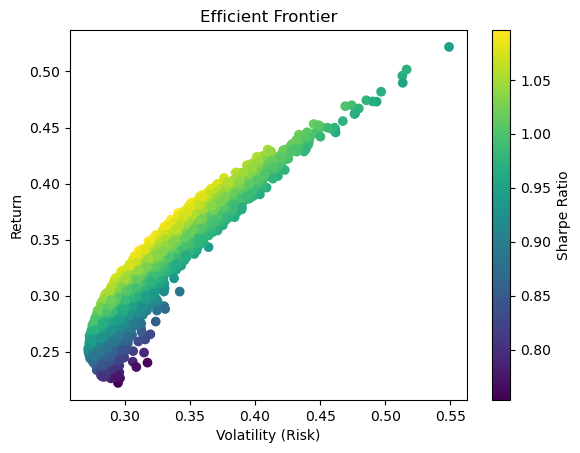

In [22]:
import matplotlib.pyplot as plt

# Plotting the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


Optimal Weights for Tangency Portfolio:
 [1.12439705e-01 0.00000000e+00 1.04083409e-17 6.08042967e-01
 2.79517329e-01]
Max Sharpe Ratio: 1.0452307556274323


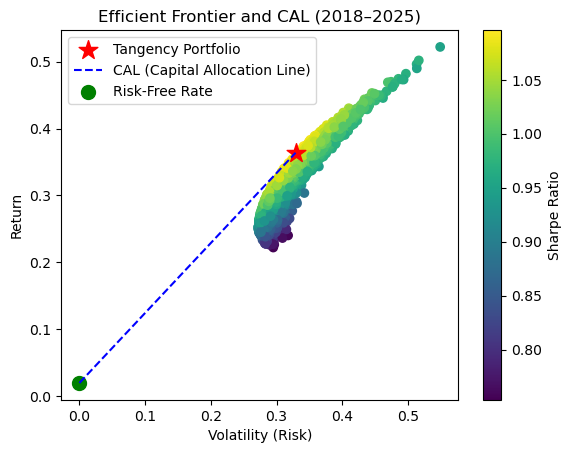

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# risk-free rate
risk_free_rate = 0.02  # 2% annual risk-free rate

# Function to calculate portfolio return and volatility
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    return portfolio_return, portfolio_stddev

# Function to calculate negative Sharpe Ratio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return, portfolio_stddev = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_stddev

# Constraints: sum of weights must be 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the weights (between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Initial guess for weights
initial_weights = np.ones(len(tickers)) / len(tickers)

# Optimize for maximum Sharpe Ratio (minimize negative Sharpe Ratio)
optimized_result = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimized weights for the tangency portfolio (maximum Sharpe Ratio portfolio)
optimal_weights = optimized_result.x
tangency_return, tangency_risk = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
max_sharpe_ratio = (tangency_return - risk_free_rate) / tangency_risk

print("Optimal Weights for Tangency Portfolio:\n", optimal_weights)
print("Max Sharpe Ratio:", max_sharpe_ratio)

# Plot the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.title('Efficient Frontier and CAL (2018–2025)')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# Plot the tangency portfolio (point with the max Sharpe Ratio)
plt.scatter(tangency_risk, tangency_return, color='red', marker='*', s=200, label='Tangency Portfolio')

# Plot the Capital Allocation Line (CAL)
# CAL: straight line from the risk-free rate to the tangency portfolio
cal_x = [0, tangency_risk]
cal_y = [risk_free_rate, tangency_return]
plt.plot(cal_x, cal_y, color='blue', linestyle='--', label='CAL (Capital Allocation Line)')

# Mark the risk-free rate on the graph
plt.scatter(0, risk_free_rate, color='green', marker='o', s=100, label='Risk-Free Rate')

plt.legend()
plt.show()
